# Imports + fonction d'affichage

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from stahl_model import Game, Population, PlayerType

plt.style.use('seaborn-v0_8') # ou 'ggplot'

def run_simulation(title, types_config, T_max=50, cost_smart=0):
    game = Game()
    pop = Population(game)
    
    # Initialisation
    for cfg in types_config:
        # cfg = (Name, Level, FixedStrat, InitialShare, Cost)
        p = PlayerType(cfg[0], cfg[1], cost=cfg[4] if len(cfg)>4 else 0, fixed_strategy=cfg[2])
        pop.add_type(p, cfg[3])
    
    pop.normalize_proportions()
    
    # Stockage pour le graph
    history = {t.name: [] for t in pop.types}
    time_steps = range(T_max)
    
    for _ in time_steps:
        props = pop.step_evolution(dt=0.2) # Pas de temps
        for i, t in enumerate(pop.types):
            history[t.name].append(props[i])
            
    # Plot
    plt.figure(figsize=(10, 6))
    for name, curve in history.items():
        plt.plot(time_steps, curve, label=name, linewidth=2.5)
    
    plt.title(title, fontsize=14)
    plt.xlabel("Temps (itérations)", fontsize=12)
    plt.ylabel("Part de population", fontsize=12)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    # Sauvegarde automatique dans le dossier report/figures (créez le dossier avant!)
    # plt.savefig(f"../report/figures/{title.replace(' ', '_')}.png") 
    plt.show()


### Figure 1 : La sélection naturelle en action (Validation du modèle)
Ce premier graphique illustre la dynamique de base de l'équation de réplication. Nous partons d'un état initial où plusieurs stratégies coexistent.
* **Observation :** Les courbes descendantes représentent les stratégies inefficaces ($Smart_0$ qui jouent mal). Elles sont éliminés par la sélection naturelle.
* **Interprétation :** Les stratégies qui offrent un gain supérieur à la moyenne se répandent (courbes montantes). Cela confirme que notre moteur de simulation fonctionne correctement : la médiocrité ne survit pas.

Génération Figure 1...


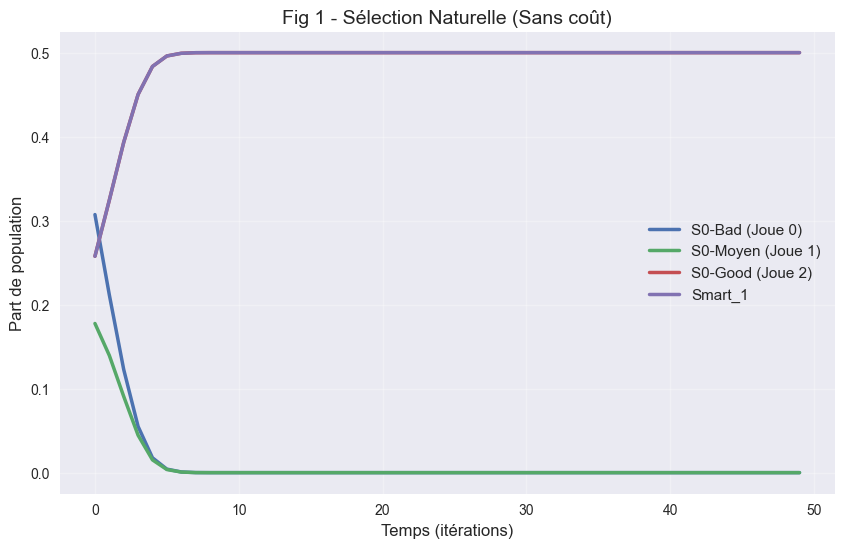

In [3]:
print("Génération Figure 1...")
# Mélange de Smart_0 (bêtes) et un peu de Smart_1
config_1 = [
    ("S0-Bad (Joue 0)", 0, 0, 0.40, 0), # Nombreux mais nuls
    ("S0-Moyen (Joue 1)", 0, 1, 0.20, 0),
    ("S0-Good (Joue 2)", 0, 2, 0.20, 0), # Chanceux
    ("Smart_1", 1, None, 0.20, 0)       # Intelligent
]
run_simulation("Fig 1 - Sélection Naturelle (Sans coût)", config_1)

### Figure 2 : L'élimination des stratégies dominées
Cette simulation illustre la **Proposition 1** de l'article de Stahl. Nous introduisons une stratégie "strictement dominée" (qui rapporte moins de points que les autres, quoi que fasse l'adversaire).
* **Observation :** La courbe de la stratégie dominée (en bas) s'effondre exponentiellement vers 0.
* **Interprétation :** L'évolution est impitoyable pour l'irrationalité pure. Peu importe le niveau d'intelligence des autres joueurs, jouer une stratégie dominée mène inévitablement à l'extinction.

Génération Figure 2...


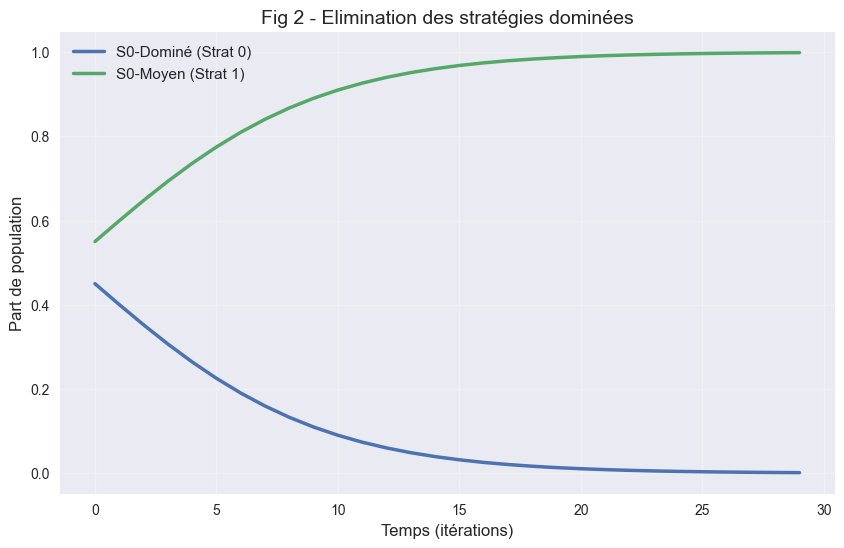

In [4]:
print("Génération Figure 2...")
# Zoom sur la stratégie dominée
config_2 = [
    ("S0-Dominé (Strat 0)", 0, 0, 0.5, 0),
    ("S0-Moyen (Strat 1)", 0, 1, 0.5, 0)
]
run_simulation("Fig 2 - Elimination des stratégies dominées", config_2, T_max=30)

### Figure 3 : Avoir raison ou être intelligent ?
C'est le cœur du paradoxe soulevé par Stahl. Nous comparons ici deux gagnants :
1.  Un **$Smart_1$** (qui *calcule* la meilleure réponse).
2.  Un **$Smart_0$ "Chanceux"** (qui est *programmé* pour jouer la bonne réponse sans réfléchir).

* **Observation :** Les deux courbes montent et se stabilisent ensemble au sommet.
* **Interprétation :** À l'équilibre, il est impossible de distinguer le génie de l'idiot chanceux. L'intelligence sert à *trouver* l'équilibre, mais une fois trouvé, elle ne donne plus d'avantage supplémentaire sur le gain brut.

Génération Figure 3...


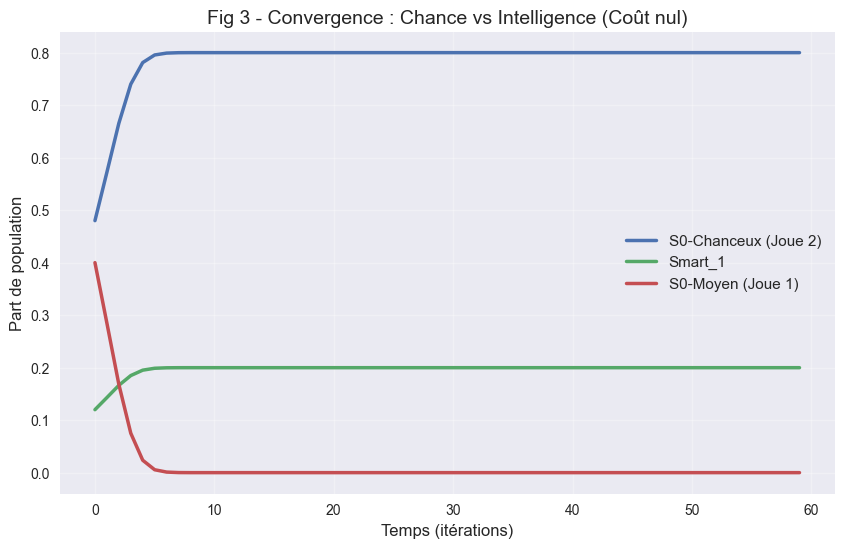

In [5]:
print("Génération Figure 3...")
# Smart_0 Chanceux (Joue Nash) vs Smart_1 (Calcule Nash)
config_3 = [
    ("S0-Chanceux (Joue 2)", 0, 2, 0.4, 0), # Il joue Nash par hasard
    ("Smart_1", 1, None, 0.1, 0),           # Il calcule
    ("S0-Moyen (Joue 1)", 0, 1, 0.5, 0)     # Chair à canon pour nourrir les autres
]
run_simulation("Fig 3 - Convergence : Chance vs Intelligence (Coût nul)", config_3, T_max=60)

### Figure 4 : Le fardeau de l'intelligence (Coûts cognitifs)
Que se passe-t-il si réfléchir coûte de l'énergie ? Ici, nous attribuons un coût ($cost > 0$) au joueur $Smart_1$, alors que le $Smart_0$ est "gratuit".
* **Observation :**
    1.  **Phase 1 :** Le $Smart_1$ domine au début car il s'adapte plus vite.
    2.  **Phase 2 :** Une fois que tout le monde joue bien, la courbe du $Smart_1$ commence à descendre jusqu'à l'extinction.
* **Interprétation :** L'intelligence est un avantage transitoire. À long terme, si elle est coûteuse, elle est éliminée par l'évolution au profit d'une "médiocrité efficace" (le $Smart_0$ qui joue juste sans payer le coût du cerveau).

Génération Figure 4...


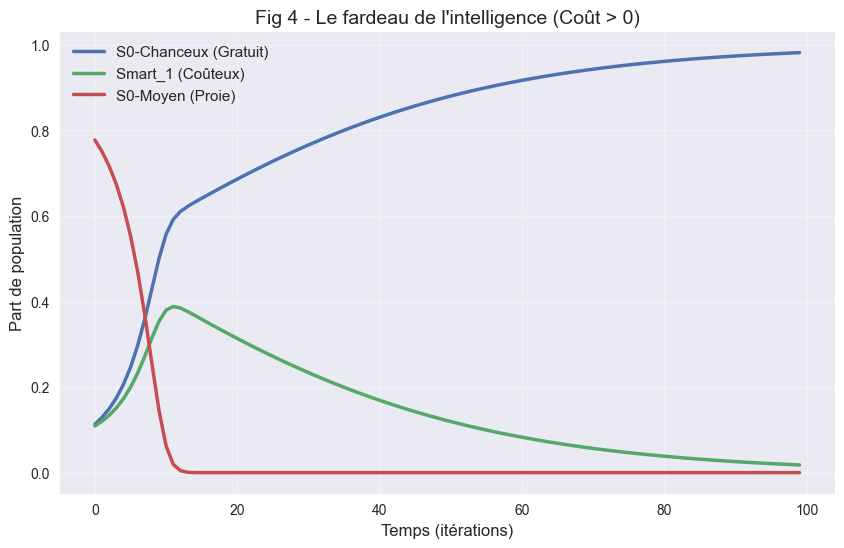

In [6]:
print("Génération Figure 4...")
# Le Smart_1 a un coût (0.1), le Smart_0 est gratuit.
config_4 = [
    ("S0-Chanceux (Gratuit)", 0, 2, 0.1, 0), 
    ("Smart_1 (Coûteux)", 1, None, 0.1, 0.2), # Coût élevé !
    ("S0-Moyen (Proie)", 0, 1, 0.8, 0)        # Beaucoup de ressources au début
]
run_simulation("Fig 4 - Le fardeau de l'intelligence (Coût > 0)", config_4, T_max=100)